<a href="https://colab.research.google.com/github/Smjfirna/Arsitektur-Compration/blob/main/Eksperimen_Sample/MobileNet/60%3A40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications import ResNet50

In [6]:
base_dir = '/content/drive/MyDrive/Skripsi Syafirna/Program/Data Sample 10'

print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['Common_rust', 'Blight', 'Healthy', 'Gray_leaf_spot']


In [7]:
Common_rust_dir = os.path.join(base_dir, 'Common_rust')
Blight_dir = os.path.join(base_dir, 'Blight')
Healthy_dir = os.path.join(base_dir, 'Healthy')
Gray_leaf_spot_dir = os.path.join(base_dir, 'Gray_leaf_spot')

In [8]:
Common_rust_fnames = os.listdir(Common_rust_dir)
Blight_fnames = os.listdir(Blight_dir)
Healthy_fnames = os.listdir(Healthy_dir)
Gray_leaf_spot_fnames = os.listdir(Gray_leaf_spot_dir)

In [9]:
print('Total Gambar Common rust :', len(os.listdir(Common_rust_dir)))
print('Total Gambar Blight :', len(os.listdir(Blight_dir)))
print('Total Gambar Healty :', len(os.listdir(Healthy_dir)))
print('Total Gambar Gray Leaf Spot :', len(os.listdir(Gray_leaf_spot_dir)))

Total Gambar Common rust : 130
Total Gambar Blight : 114
Total Gambar Healty : 116
Total Gambar Gray Leaf Spot : 57


In [39]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs= 10

datagen = ImageDataGenerator( rescale = 1.0/255.,
                             validation_split=0.4
                            )

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='validation'
)

Found 252 images belonging to 4 classes.
Found 165 images belonging to 4 classes.


In [32]:
# Initialize ResNet50 base model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))

# Freeze the convolutional base
for layer in resnet50_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(resnet50_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
8/8 [==============================] - 5s 584ms/step - loss: 0.7179 - accuracy: 0.7103 - val_loss: 0.8730 - val_accuracy: 0.6970
Epoch 2/10
8/8 [==============================] - 5s 738ms/step - loss: 0.7302 - accuracy: 0.7143 - val_loss: 0.9115 - val_accuracy: 0.6364
Epoch 3/10
8/8 [==============================] - 5s 572ms/step - loss: 0.8960 - accuracy: 0.6587 - val_loss: 0.8651 - val_accuracy: 0.7030
Epoch 4/10
8/8 [==============================] - 6s 734ms/step - loss: 0.6182 - accuracy: 0.7579 - val_loss: 0.8985 - val_accuracy: 0.6727
Epoch 5/10
8/8 [==============================] - 5s 595ms/step - loss: 0.6627 - accuracy: 0.7222 - val_loss: 0.8430 - val_accuracy: 0.6970
Epoch 6/10
8/8 [==============================] - 5s 675ms/step - loss: 0.6352 - accuracy: 0.7460 - val_loss: 1.5238 - val_accuracy: 0.4727
Epoch 7/10
8/8 [==============================] - 5s 638ms/step - loss: 0.8702 - accuracy: 0.6508 - val_loss: 0.9335 - val_accuracy: 0.6909
Epoch 8/10
8/8 [====

6/6 [==============================] - 2s 390ms/step


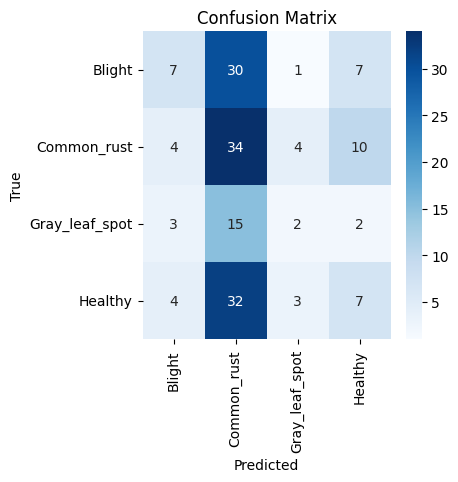


Classification Report:
                 precision    recall  f1-score   support

        Blight       0.39      0.16      0.22        45
   Common_rust       0.31      0.65      0.42        52
Gray_leaf_spot       0.20      0.09      0.13        22
       Healthy       0.27      0.15      0.19        46

      accuracy                           0.30       165
     macro avg       0.29      0.26      0.24       165
  weighted avg       0.30      0.30      0.26       165



In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))